### Lab-3 : Self-Practice

#### In this week, your self-practice task will consist to analyze the impact of class imballance on the performance of the logistic regression model.

#### Class imbalance is very common in real life. For example, in a classification problem to predict whether a person has a certain very rare disease, the dataset will always contain more negative samples than positive ones. This situation can have a significant impact on the performance of the model. You will analyze this situation in the case of the Titanic dataset used in the lab.

### 1. Load the titanic dataset and <b>PLOT</b> the proportion of positive and negative samples (survived vs non survived)

      survived  pclass     sex    age  sibsp  parch      fare embarked
0            1       1  female  29.00      0      0  211.3375        S
1            1       1    male   0.92      1      2  151.5500        S
2            0       1  female   2.00      1      2  151.5500        S
3            0       1    male  30.00      1      2  151.5500        S
4            0       1  female  25.00      1      2  151.5500        S
...        ...     ...     ...    ...    ...    ...       ...      ...
1304         0       3  female  14.50      1      0   14.4542        C
1305         0       3  female    NaN      1      0   14.4542        C
1306         0       3    male  26.50      0      0    7.2250        C
1307         0       3    male  27.00      0      0    7.2250        C
1308         0       3    male  29.00      0      0    7.8750        S

[1309 rows x 8 columns]


<AxesSubplot: xlabel='survived', ylabel='count'>

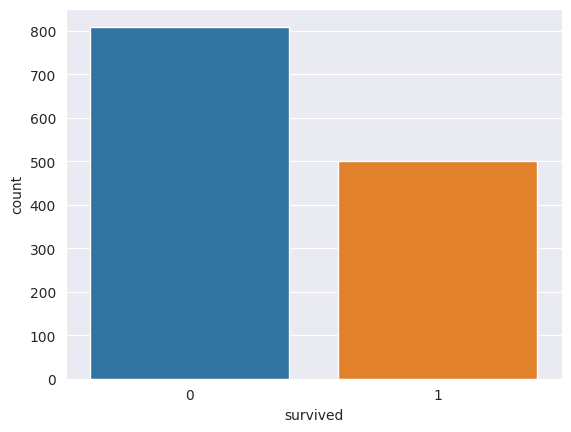

In [35]:
### write your code here. Load the dataset and plot (barplot) proportion of each class
import pandas as pd
import seaborn

titanic_data = pd.read_csv('titanic.csv')
titanic_data.shape
titanic_data = titanic_data.drop(['name'], axis=1)
print(titanic_data)
seaborn.countplot(x='survived', data=titanic_data)

In [36]:

X, y = titanic_data.loc[:, 'pclass':], titanic_data.loc[:, 'survived']


#### Preprocess the data as it has been done in the lab, feel free to adapt

In [37]:
#### preprocess the data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# imputing missing values
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X)
X = pd.DataFrame(imputer.transform(X), columns=X.columns)


# one-hot-encode categorical features
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names(features_name))
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df


encoder = OneHotEncoder(sparse=False, drop='first')
f_names = ['sex', 'embarked']
encoder.fit(X[f_names])
X = ohe_new_features(X, f_names, encoder)

# feature scaling
scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 2. Impact of class imballance. 
##### Now, you will `artificially` imbalance the dataset. From the original dataset, create different dataset with the following class representations (drop samples from one class): 
##### 1. 20% vs 80%
##### 2. 30% vs 70%
##### 3. 40% vs 60%

## Split each data into train and test set as in the lab; train logistic regression model for each setting and report (PLOT) the accuracy, precision, and recall of each model

0    0.799407
1    0.200593
Name: survived, dtype: float64
Accuracy: 0.857707509881423
Recall: 0.34
Precision: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


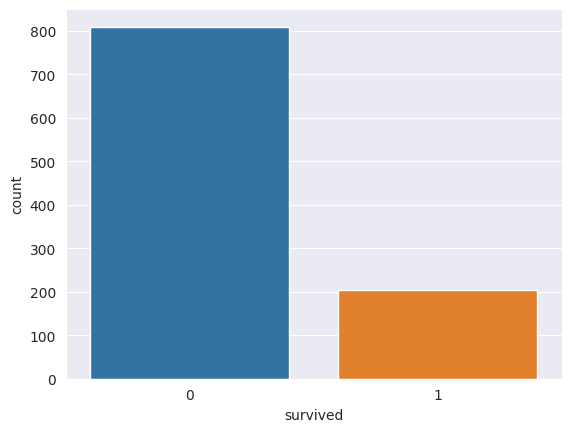

In [38]:
import random
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
def calc_percentage(y: pd.DataFrame):
    frequency = Counter(y)
    for category in frequency:
        frequency[category] = frequency[category] / len(y)

    return frequency


def drop_random_entry(X, y, category):
    category_indices = y.index[y == 1].values
    index_to_drop = random.choice(category_indices)

    new_X = X.drop(index=[index_to_drop])
    new_y = y.drop(index=[index_to_drop])
    return new_X, new_y


def imbalance_dataset(X, y, desired_percentage):
    new_X = X
    new_y = y

    curr_percentage = calc_percentage(new_y)
    eps = 0.001
    category_to_drop = 1

    while abs(curr_percentage[1] - desired_percentage) > eps:
        new_X, new_y = drop_random_entry(new_X, new_y, category_to_drop)
        curr_percentage = calc_percentage(new_y)

    return new_X, new_y


x20, y20 = imbalance_dataset(X, y, 0.2)
print(y20.value_counts(normalize=True))
y20 = pd.DataFrame(y20, columns=['survived'])
seaborn.countplot(x='survived', data=y20)
x20_train, x20_test, y20_train, y20_test = train_test_split(x20, y20)
reg = LogisticRegression().fit(x20_train, y20_train)
y20_pred = reg.predict(x20_test)
print(f'Accuracy: {accuracy_score(y20_test, y20_pred)}')
print(f'Recall: {recall_score(y20_test, y20_pred)}')
print(f'Precision: {precision_score(y20_test, y20_pred)}')

0    0.699222
1    0.300778
Name: survived, dtype: float64
Accuracy: 0.8172413793103448
Recall: 0.569620253164557
Precision: 0.703125


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


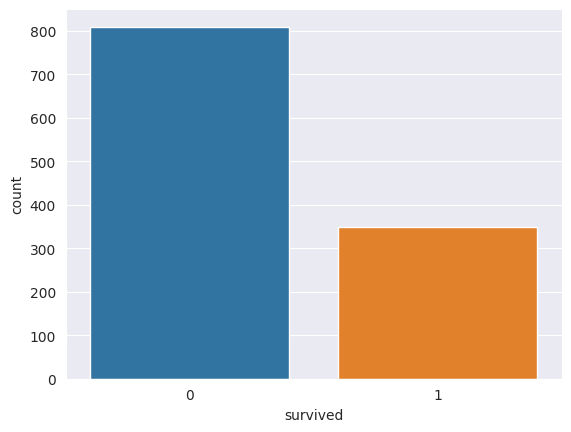

In [39]:
x30, y30 = imbalance_dataset(X, y, 0.3)
print(y30.value_counts(normalize=True))
y30 = pd.DataFrame(y30, columns=['survived'])
seaborn.countplot(x='survived', data=y30)
x30_train, x30_test, y30_train, y30_test = train_test_split(x30, y30)
reg = LogisticRegression().fit(x30_train, y30_train)
y30_pred = reg.predict(x30_test)
print(f'Accuracy: {accuracy_score(y30_test, y30_pred)}')
print(f'Recall: {recall_score(y30_test, y30_pred)}')
print(f'Precision: {precision_score(y30_test, y30_pred)}')

0    0.619449
1    0.380551
Name: survived, dtype: float64
Accuracy: 0.7920489296636085
Recall: 0.6976744186046512
Precision: 0.7563025210084033


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


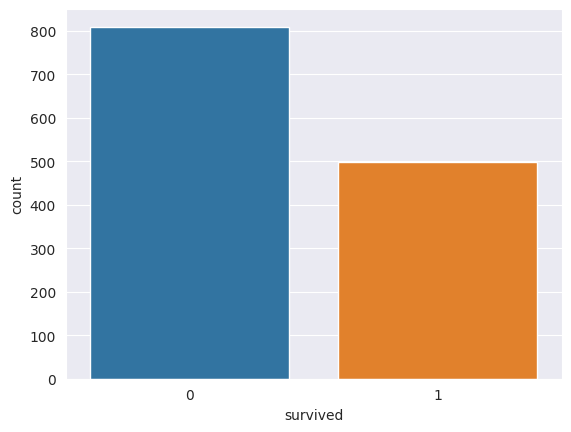

In [40]:
x40, y40 = imbalance_dataset(X, y, 0.38)
print(y40.value_counts(normalize=True))
y40 = pd.DataFrame(y40, columns=['survived'])
seaborn.countplot(x='survived', data=y40)
x40_train, x40_test, y40_train, y40_test = train_test_split(x40, y40)
reg = LogisticRegression().fit(x40_train, y40_train)
y40_pred = reg.predict(x40_test)
print(f'Accuracy: {accuracy_score(y40_test, y40_pred)}')
print(f'Recall: {recall_score(y40_test, y40_pred)}')
print(f'Precision: {precision_score(y40_test, y40_pred)}')

## 3. Analyse the class-wise accuracy. 
#### For each model, plot (bar plots) the class-wise accuracy, i.e., the accuracy for each class.

## 4. Report 
### Write a small report (few sentences) to discuss from your analysis, the impact of class imballance on logistic model's performance 

Logistic regression (LR) is robust in the face of class imbalance. Unless the imbalance is extreme, with adequate sample sizes model performance does not degrade. Even in extreme cases, performance may not be affected